<a href="https://colab.research.google.com/github/Bavitayadav8/Bavitayadav8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it
from copy import deepcopy
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [59]:
import pandas as pd
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


part 1- solution

In [60]:
x=df[['Mileage']]
y=df['Price']
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [9]:
print('Linear Regression Equation: y = {:.2f} * x + {:.2f}'
      .format(LR.coef_[0], LR.intercept_))

Linear Regression Equation: y = -0.17 * x + 24764.56


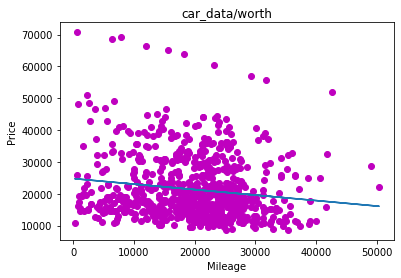

In [10]:
plt.scatter(x, y, color='m')
plt.plot(x, LR.predict(x))
plt.title('car_data/worth')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [12]:
from sklearn.linear_model import Ridge

x=df[['Mileage']]
y=df['Price']
#LR = LinearRegression()
#LR.fit(x,y)
print('R^2 score for this equation:',LR.score(x,y))

# ridge = Ridge(alpha=1)
# ridge.fit(x,y)
# print('R^2 score for this equation:',ridge.score(x,y))

R^2 score for this equation: 0.02046344732348926


Because this is below 0.8, this is not a good fit for this data.

**part 2- solution**

In [61]:
x=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound']]
x.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound
0,8221,6,3.1,4,1,1
1,9135,6,3.1,4,1,1
2,13196,6,3.1,4,1,1
3,16342,6,3.1,4,1,0
4,19832,6,3.1,4,1,0


In [62]:
x= df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound']]
y= df['Price']
LR = LinearRegression()
LR.fit(x,y)

print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(x.columns, LR.coef_, LR.intercept_))


The equation for columns Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound'], dtype='object') with respect to Salary:
[-1.67992768e-01  3.78004128e+03 -5.88273738e+02 -1.62253918e+03
  5.90894428e+03 -1.47604003e+03] + 8825.060381720243


cruise value of price is higher comperission to other value.
cylinder is the second higher value 

In [63]:
# from sklearn.linear_model import Ridge

# x= df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound']]
# y= df['Price']
# LR = LinearRegression()
# LR.fit(x,y)

# ridge = Ridge(alpha=1)
# ridge.fit(x,y)
print('R^2 score for this equation:',LR.score(x,y))

R^2 score for this equation: 0.4244182401799875


Because this is below 0.8, this is not a good fit for this data.

In [64]:
print("coefficient of feature: ",LR.coef_)

coefficient of feature:  [-1.67992768e-01  3.78004128e+03 -5.88273738e+02 -1.62253918e+03
  5.90894428e+03 -1.47604003e+03]


In [19]:
# from sklearn.model_selection import train_test_split 

# x= df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound']]
# y= df['Price']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
# LR = LinearRegression()
# LR.fit(x_train,y_train)

# prediction = LR.predict(x_train)

# print(" best predictor for price :",(y_train,prediction))

In [20]:
# from sklearn.model_selection import train_test_split 

# x= df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound']]
# y= df['Price']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
# LR = LinearRegression()
# LR.fit(x_test,y_test)

# prediction = LR.predict(x_test)

# print(" best predictor for price :",(y_test,prediction))

dumies variable -- **Make**

part 3 - hard mode

In [25]:
make = pd.get_dummies(df['Make'])
make.head()

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [26]:
make = make.rename(columns={'Buick':'make(Buick)', 'Cadillac':'make(Cadillac)', 'Chevrolet':'make(Chevrolet)', 'Pontiac':'make(Pontiac)','SAAB':'make(SAAB)', 'Saturn':'make(Saturn)'})
make.head()

,make(Buick),make(Cadillac),make(Chevrolet),make(Pontiac),make(SAAB),make(Saturn)
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [27]:
df = pd.concat([df,make], axis=1)
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,make(Buick),make(Cadillac),make(Chevrolet),make(Pontiac),make(SAAB),make(Saturn)
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1,0,0,0,0,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1,0,0,0,0,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1,0,0,0,0,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1,0,0,0,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1,0,0,0,0,0


In [28]:
df = df.drop('Make',axis=1)
df.head()

,Price,Mileage,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,make(Buick),make(Cadillac),make(Chevrolet),make(Pontiac),make(SAAB),make(Saturn)
0,17314.103129,8221,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1,0,0,0,0,0
1,17542.036083,9135,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1,0,0,0,0,0
2,16218.847862,13196,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1,0,0,0,0,0
3,16336.913140,16342,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1,0,0,0,0,0
4,16339.170324,19832,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1,0,0,0,0,0


**body_type**

In [29]:
body_type = pd.get_dummies(df['Type'])
body_type.head()

,Convertible,Coupe,Hatchback,Sedan,Wagon
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [30]:
body_type = body_type.rename(columns={'Convertible':'body_type(Convertible)', 'Coupe':'body_type(Coupe)','Hatchback':'body_type(Hatchback)','Sedan':'body_type(Sedan)','Wagon':'body_type(Wagon)'})
body_type.head()

,body_type(Convertible),body_type(Coupe),body_type(Hatchback),body_type(Sedan),body_type(Wagon)
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [31]:
df = pd.concat([df,body_type], axis=1)
df.head()

,Price,Mileage,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,...,make(Cadillac),make(Chevrolet),make(Pontiac),make(SAAB),make(Saturn),body_type(Convertible),body_type(Coupe),body_type(Hatchback),body_type(Sedan),body_type(Wagon)
0,17314.103129,8221,Century,Sedan 4D,Sedan,6,3.1,4,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Century,Sedan 4D,Sedan,6,3.1,4,1,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Century,Sedan 4D,Sedan,6,3.1,4,1,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Century,Sedan 4D,Sedan,6,3.1,4,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Century,Sedan 4D,Sedan,6,3.1,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df = df.drop('Type',axis=1)
df.head()

,Price,Mileage,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,...,make(Cadillac),make(Chevrolet),make(Pontiac),make(SAAB),make(Saturn),body_type(Convertible),body_type(Coupe),body_type(Hatchback),body_type(Sedan),body_type(Wagon)
0,17314.103129,8221,Century,Sedan 4D,6,3.1,4,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Century,Sedan 4D,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Century,Sedan 4D,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Century,Sedan 4D,6,3.1,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Century,Sedan 4D,6,3.1,4,1,0,1,...,0,0,0,0,0,0,0,0,1,0


**model**

In [33]:
model = pd.get_dummies(df['Model'])


In [34]:
model.head()

,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,...,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df = pd.concat([df,model], axis=1)
df.head()

,Price,Mileage,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,...,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8
0,17314.103129,8221,Century,Sedan 4D,6,3.1,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,17542.036083,9135,Century,Sedan 4D,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,16218.847862,13196,Century,Sedan 4D,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16336.913140,16342,Century,Sedan 4D,6,3.1,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16339.170324,19832,Century,Sedan 4D,6,3.1,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df = df.drop('Model',axis=1)
df.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,make(Buick),...,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Make         804 non-null    object 
 3   Trim         804 non-null    object 
 4   Cylinder     804 non-null    int64  
 5   Liter        804 non-null    float64
 6   Doors        804 non-null    int64  
 7   Cruise       804 non-null    int64  
 8   Sound        804 non-null    int64  
 9   Leather      804 non-null    int64  
 10  9_3          804 non-null    uint8  
 11  9_3 HO       804 non-null    uint8  
 12  9_5          804 non-null    uint8  
 13  9_5 HO       804 non-null    uint8  
 14  AVEO         804 non-null    uint8  
 15  Bonneville   804 non-null    uint8  
 16  CST-V        804 non-null    uint8  
 17  CTS          804 non-null    uint8  
 18  Cavalier     804 non-null    uint8  
 19  Century 

In [51]:
features = list(df.columns[3:])
features.append("Mileage")
print(features)

['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'make(Buick)', 'make(Cadillac)', 'make(Chevrolet)', 'make(Pontiac)', 'make(SAAB)', 'make(Saturn)', 'body_type(Convertible)', 'body_type(Coupe)', 'body_type(Hatchback)', 'body_type(Sedan)', 'body_type(Wagon)', '9-2X AWD', '9_3', '9_3 HO', '9_5', '9_5 HO', 'AVEO', 'Bonneville', 'CST-V', 'CTS', 'Cavalier', 'Century', 'Classic', 'Cobalt', 'Corvette', 'Deville', 'G6', 'GTO', 'Grand Am', 'Grand Prix', 'Impala', 'Ion', 'L Series', 'Lacrosse', 'Lesabre', 'Malibu', 'Monte Carlo', 'Park Avenue', 'STS-V6', 'STS-V8', 'Sunfire', 'Vibe', 'XLR-V8', 'Mileage']


In [52]:
x = df[features]
y = df['Price']

LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [54]:
print("coefficient of feature: ",LR.coef_)

coefficient of feature:  [ 5.42379044e+02  1.29237519e+03 -1.27829701e+03  2.42035608e+01
  2.18363418e+02  3.27988648e+02 -3.16039326e+03  1.30213147e+04
 -4.88007742e+03 -4.67567935e+03  4.71023130e+03 -5.01539600e+03
  3.40614520e+03 -2.76699669e+03 -3.34485968e+02 -5.19546067e+02
  2.14883530e+02 -2.60920515e+03  4.76735849e+02  1.51108916e+03
  3.43085398e+03  1.90075746e+03 -4.93611922e+03  3.57062194e+02
  3.77804366e+03 -6.53389096e+03 -3.94804525e+03 -4.61122096e+03
 -2.89432746e+03 -2.94078233e+03  1.18477723e+04 -3.46964696e+03
  2.71553375e+02  5.52879392e+03 -3.98758695e+03 -1.56899086e+03
  4.38170518e+02 -2.67596496e+03 -2.33943105e+03  2.26749166e+02
 -1.34597822e+03 -2.48428616e+03  3.75401387e+01  2.57005676e+03
 -1.87689942e+02  2.99162869e+03 -4.35664023e+03 -9.19870791e+02
  1.64428702e+04 -1.79761908e-01]
